In [16]:
# importing the modules

import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# loading the training model

detector=tf.keras.models.load_model("C:\\Users\\admin\\Downloads\\emotion_detector.keras")

In [17]:
# defining class names

class_names=['angry', 'happy', 'relaxed', 'sad']

In [27]:
# function to load and preprocess image

def image_processing(image_paths):
    images=[]
    for path in image_paths:
        image=cv2.imread(path)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image=cv2.resize(image,(192,192))
        images.append(image)
    images=np.asarray(images)
    return images

In [31]:
# image path
image1="images_for_test\\angry.webp"
image2="images_for_test\\happy.png"
image3="images_for_test\\sad.webp"
image4="images_for_test\\relaxed.jpg"

image_paths=[image1,image2,image3,image4]

images=image_processing(image_paths)

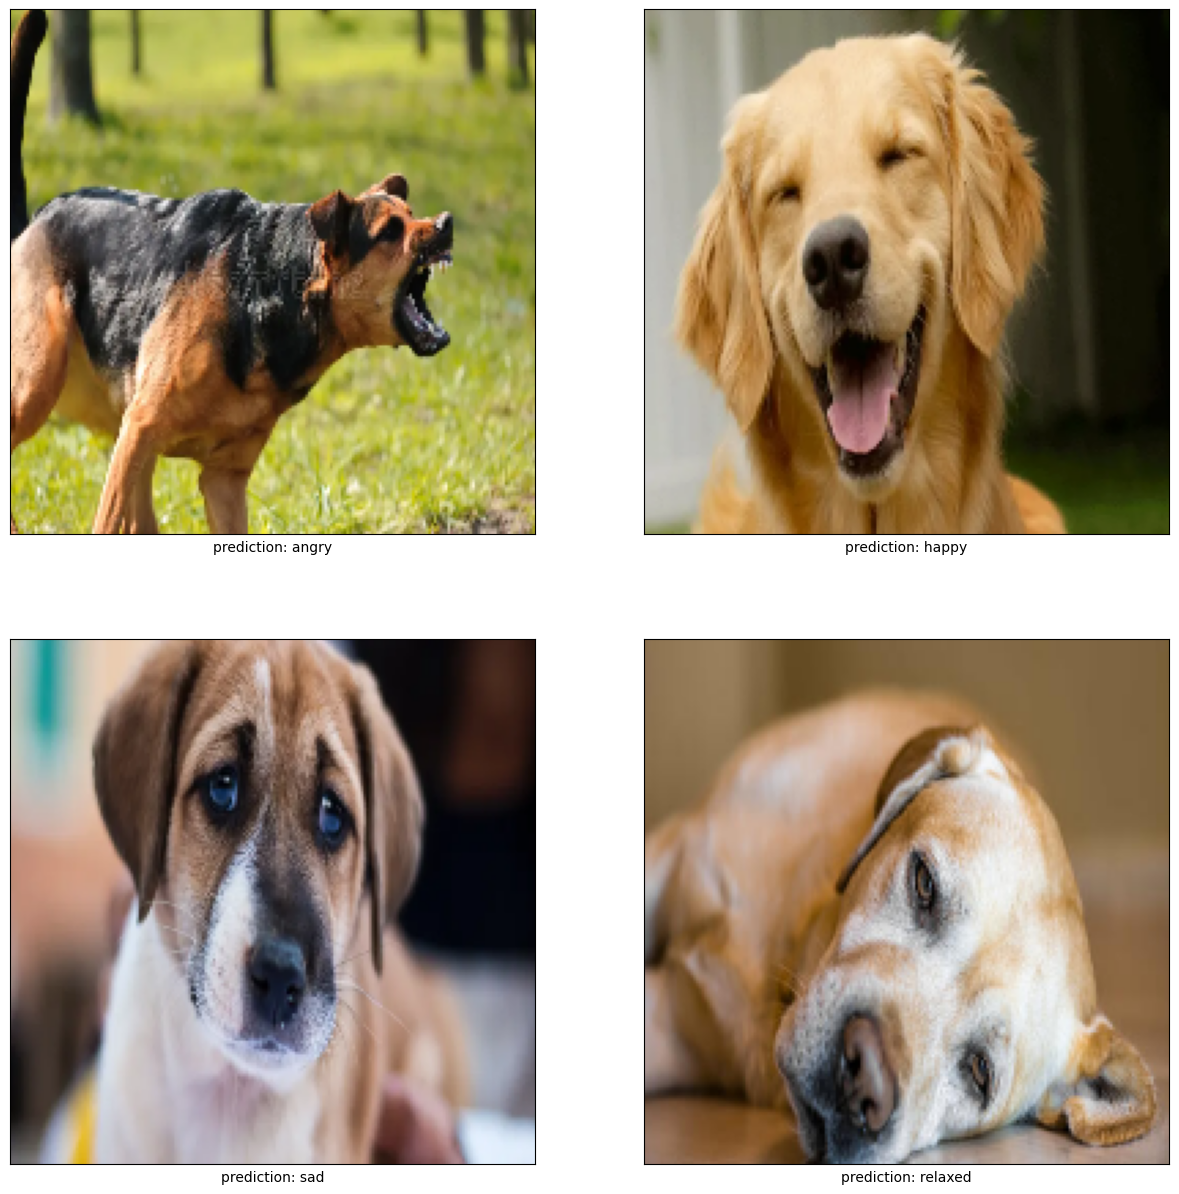

In [33]:
# prediction of images

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

i = 0
for x in range(2):
    for y in range(2):
        prediction = detector.predict(images[i][None, ...], verbose=0)[0]
        
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(f'prediction: {class_names[np.argmax(prediction)]}')
        
        axs[x][y].imshow(images[i])
        
        i += 1
plt.show()

In [53]:
# using model with webcam

cam=cv2.VideoCapture(0)
while True:
    _,frame=cam.read()
    frame=cv2.flip(frame,1)
    image=cv2.resize(frame,(192,192))
    prediction=class_names[np.argmax(detector.predict(image.reshape(1,192,192,3),verbose=0))]
    cv2.putText(frame, prediction, (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA) 
    cv2.imshow("image",frame)
    if cv2.waitKey(1)==27:
        break
cam.release()
cv2.destroyAllWindows()